In [1]:
import nbimporter
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from Funciones import CV

from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("datos_limpios_my")
df = df.drop(['Unnamed: 0'], axis = 1)
columnas = df.columns
l = ['ID']
for i in columnas:
    l.append(i)
df['ID'] = list(range( len(df['AGE'])))
df = df[l]

In [3]:
df.head()

,ID,AGE,90S,SCA,SCA90,GCA,GCA90,TACKLES,TACKLESWIN,VSDRIBLETACKLE,...,ASSIST,SHOTPASSES,TOTALTOUCHES,TOTALDRIBBLES,DISTANCE,GOALS,SHOTS,SHOTSONTARGET,FREEKICKS,VAL
0,0,2.342986,0.726470,0.344939,-0.142975,-0.256879,-0.389406,-0.583823,-0.501789,-0.843356,...,-0.127088,-0.048286,-0.235120,0.464852,-0.356740,2.384890,2.168509,2.481177,-0.346226,83
1,1,0.953503,-1.251821,-0.904343,-0.604165,-0.256879,2.400470,-1.077232,-1.044754,-0.953523,...,-0.669687,-0.872074,-1.197470,-0.651309,-1.132253,-0.579342,-0.544958,-0.468147,-0.346226,73
2,2,-1.825463,-1.428288,-0.980057,-1.133178,-0.806475,-0.708249,-1.032377,-0.976883,-0.843356,...,-0.669687,-0.872074,-1.291546,-0.810760,-1.193052,-0.579342,-0.870574,-0.749035,-0.346226,63
3,3,0.490342,1.339461,1.442794,0.291087,2.216300,0.726544,1.748660,1.805811,1.910840,...,3.671110,1.973740,2.827743,0.943207,1.435228,0.079376,-0.056534,-0.046815,-0.346226,87
4,4,-0.667561,-0.778146,-0.412201,0.182571,0.567514,1.882350,-0.897811,-0.841142,-0.953523,...,0.958111,-0.123176,-0.859722,-0.279255,-0.936799,0.738094,-0.056534,0.234073,-0.346226,79


In [4]:
X = df.drop(['VAL'], axis = 1)
Y = df['VAL']
from sklearn.preprocessing import StandardScaler
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_valid = scaler.transform(X_valid)
#X_test = scaler.transform(X_test)

In [5]:
#pg 308
'''model = keras.models.Sequential([keras.layers.Dense(16, activation = 'relu'), keras.layers.Dense(1)])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_valid, Y_valid))
mse_test = model.evaluate(X_test, Y_test)
X_new = X_test[:3]
Y_pred = model.predict(X_new)'''

'model = keras.models.Sequential([keras.layers.Dense(16, activation = \'relu\'), keras.layers.Dense(1)])\nmodel.compile(loss = "mean_squared_error", optimizer = "sgd")\nhistory = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_valid, Y_valid))\nmse_test = model.evaluate(X_test, Y_test)\nX_new = X_test[:3]\nY_pred = model.predict(X_new)'

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=16, kernel_initializer='normal', activation='relu', input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, Y_train, epochs=200, validation_data = (X_valid, Y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
36/36 [==============================] - 1s 6ms/step - loss: 4065.0322 - mse: 4065.0322 - mae: 60.4888 - val_loss: 1733.8549 - val_mse: 1733.8549 - val_mae: 34.0542
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 1465.7362 - mse: 1465.7362 - mae: 31.7997 - val_loss: 1513.4360 - val_ms

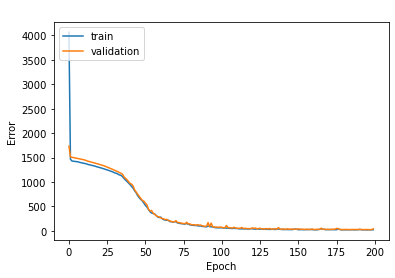

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(' ')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
ynew= model.predict(X_test)
Y_test = list(Y_test)
c = 0
l = []
for i in range(len(X_test)):
   r = (float(Y_test[i]) - ynew[i].item())**2
   c += r
   if r > 5**2:
    l.append(X_test['ID'].iloc()[i])
c = c/376
print(c**(1/2))
print(l)

12/12 [==============================] - 0s 1ms/step
6.284139365413593
[655, 829, 1091, 1473, 1863, 1651, 182, 892, 861, 1050, 1505, 1764, 1581, 1821, 1663, 609, 895, 1913, 475, 18, 1087, 17, 220, 1190, 1532, 1826, 76, 1431, 322, 6, 1290, 839, 1776, 1426, 294, 712, 85, 1096, 1869, 47, 1765, 574, 30, 1359, 914, 539, 1904, 1780, 1317, 200, 303, 1571, 1564, 1722, 1441, 1074, 1627, 148, 996, 1051, 1712, 1514, 795, 1814, 1421, 1223, 223, 596, 1471, 1562, 965, 1586, 1248, 1844, 1432, 1002, 1720, 333, 1675, 568, 326, 1360, 1717, 289, 1726, 14, 1414, 491, 427, 1003, 1909, 1875, 506, 1758, 191, 981, 1804, 1049, 310, 1430, 1280, 438, 1132, 1785, 1782, 1081, 913, 1579, 141, 279, 1276, 55, 521, 1521, 1364, 1125, 565, 39, 66, 1705, 1311, 206, 918, 5, 58, 1428, 1089, 1379, 384, 1226, 19, 946, 54, 1518, 984, 1846, 1148, 82, 1165, 1437, 122, 519, 1636, 48, 1150, 1277, 1234, 52, 638, 1453, 847, 318, 1902, 251, 1452, 1672, 1872, 299, 518, 1213, 933, 271, 214, 1908, 1439, 1795, 4]


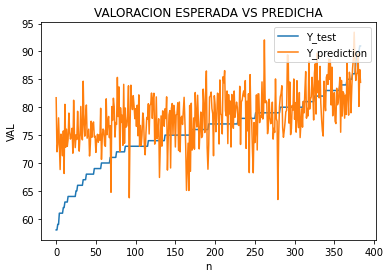

In [9]:
l = []
l1 =list(Y_test)
l2 = list(ynew)
l1new = []
l2new = []
for i in range(len(Y_test)):
    l.append([l1[i],l2[i]])
while len(l) != 0:
    c = 0
    min = l[0][0]
    for i in range(len(l)):
        if l[i][0] < min:
            min = l[i][0]
            c = i
    l1new.append(l[c][0])
    l2new.append(l[c][1])
    l.pop(c)
n = list(range(len(Y_test)))
fig, ax = plt.subplots()

ax.plot(n, l1new, label = "Y_test")
#ax.plot(n, n1, label = "n^2 - 1")
ax.plot(n, l2new, label = "Y_prediction")
#ax.plot(n, n2, label = "3^(n^2)")
ax.legend(loc = 'upper right')
ax.set_xlabel("n")
ax.set_ylabel("VAL")
ax.set_title("VALORACION ESPERADA VS PREDICHA")
plt.savefig('VALORACION ESPERADA VS PREDICHA.png')

len x =  1917


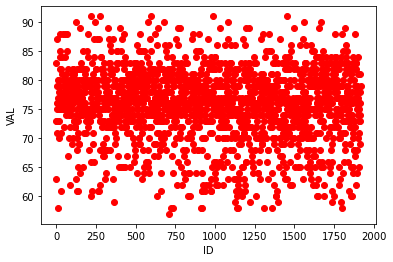

len x =  1917


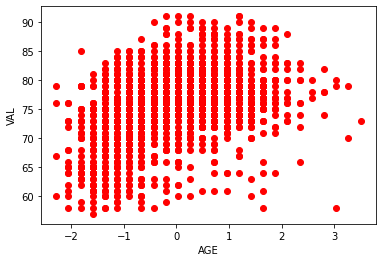

len x =  1917


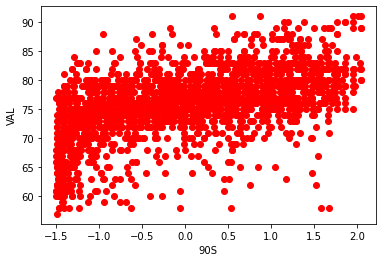

len x =  1917


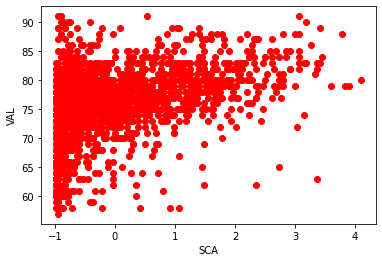

len x =  1917


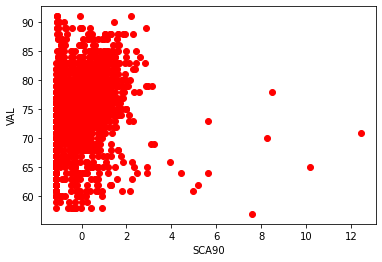

len x =  1917


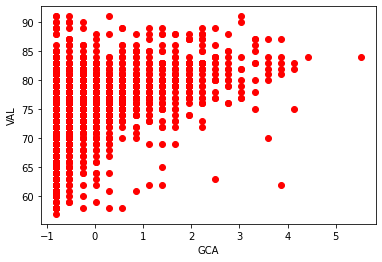

len x =  1917


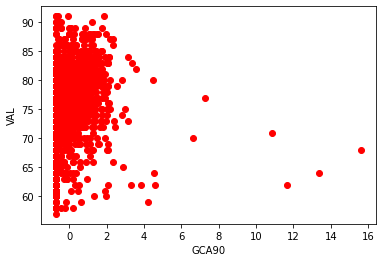

len x =  1917


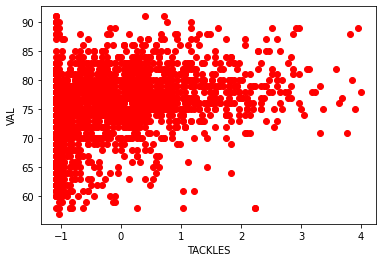

len x =  1917


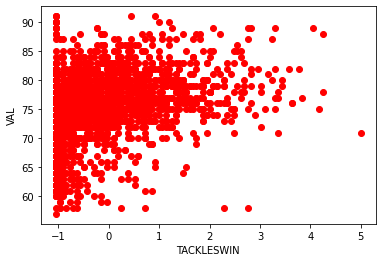

len x =  1917


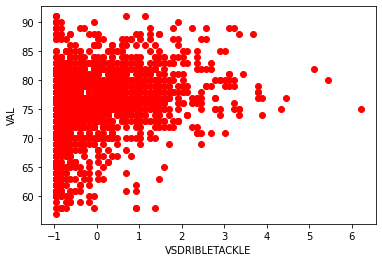

len x =  1917


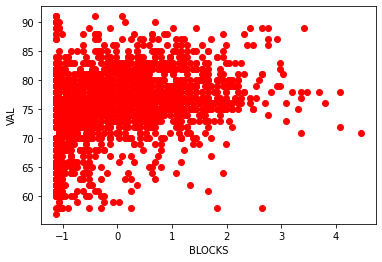

len x =  1917


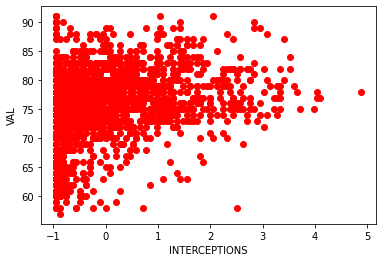

len x =  1917


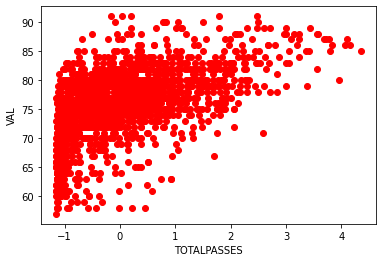

len x =  1917


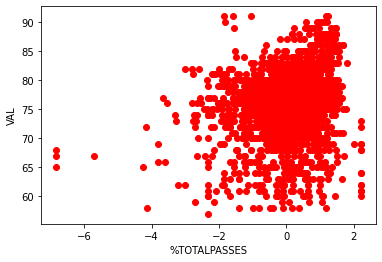

len x =  1917


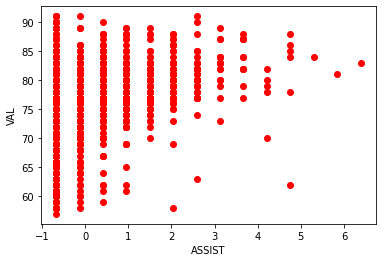

len x =  1917


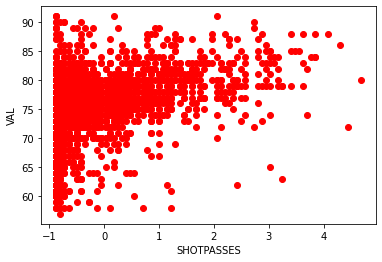

len x =  1917


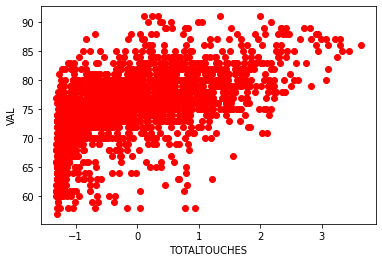

len x =  1917


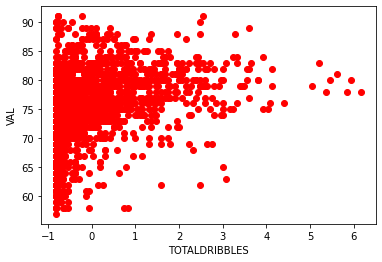

len x =  1917


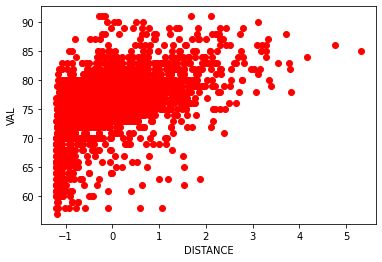

len x =  1917


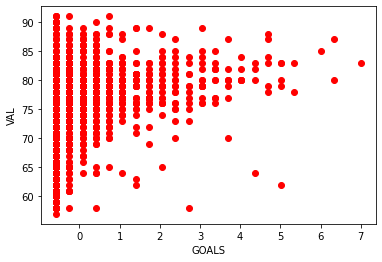

len x =  1917


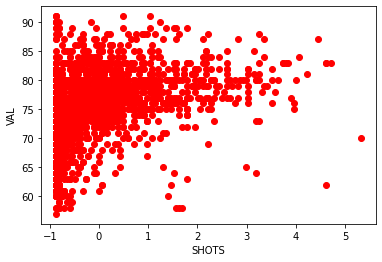

len x =  1917


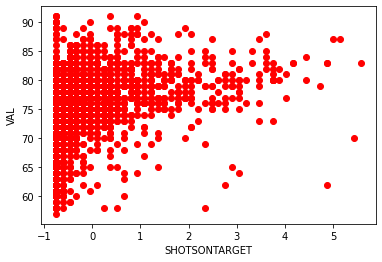

len x =  1917


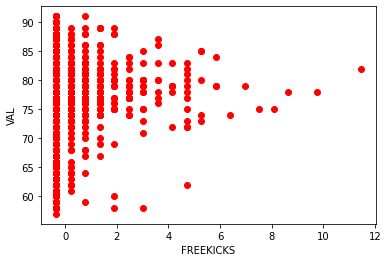

len x =  1917


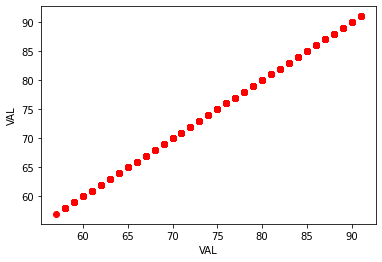

In [10]:
for col in df.columns:
    x = list(df[col])
    y = list(df['VAL'])
    x1 = []
    y1 = []
    print('len x = ', len(x))
    t = len(x)
    for i in range(t-1,-1,-1):
        if i in l:
            x1.append(x[i])
            x.pop(i)
            y1.append(y[i])
            y.pop(i)
    plt.scatter(x,y,c="red")
    plt.scatter(x1,y1,c="green")
    plt.xlabel(col)
    plt.ylabel("VAL")
    plt.show()

In [11]:
#SE PUEDE OBSERVAR COMO CUANDO TIENEN ESTADISTICAS BAJAS, LOS ERRORES SON JODIDOS

#####VAMOS A QUITAR A LOS QUE TENGAN LAS ESTADISTICAS MAS BAJAS EN GENERAL

In [12]:
columnas = df.columns[1:-1]
lista = []
for i in range(len(df)):
    c = 0
    for col in columnas:
        l = list(df[col])
        if l[i] < df[col].quantile(.15):
            c +=1
    if c > 5:
        lista.append(i)
print(lista)

[1, 2, 8, 12, 13, 14, 20, 27, 30, 33, 40, 57, 63, 85, 97, 127, 128, 129, 132, 135, 137, 138, 141, 145, 148, 174, 185, 188, 189, 208, 220, 221, 226, 238, 242, 256, 266, 275, 277, 279, 281, 291, 295, 309, 313, 316, 339, 351, 353, 356, 362, 365, 368, 372, 379, 393, 395, 396, 406, 417, 419, 421, 430, 435, 439, 440, 457, 465, 467, 489, 495, 496, 499, 506, 508, 518, 542, 548, 552, 555, 562, 575, 580, 586, 593, 595, 600, 603, 610, 617, 625, 639, 645, 654, 658, 667, 670, 675, 676, 681, 686, 705, 709, 717, 718, 723, 733, 737, 746, 747, 753, 767, 770, 782, 785, 791, 793, 804, 806, 816, 817, 818, 826, 843, 851, 867, 871, 879, 916, 917, 918, 920, 925, 932, 934, 938, 940, 941, 942, 952, 960, 979, 982, 987, 992, 998, 1000, 1002, 1007, 1010, 1018, 1019, 1029, 1034, 1038, 1042, 1043, 1049, 1061, 1066, 1067, 1069, 1074, 1075, 1076, 1081, 1086, 1095, 1103, 1104, 1112, 1118, 1124, 1131, 1132, 1136, 1141, 1143, 1146, 1147, 1149, 1150, 1155, 1163, 1171, 1172, 1175, 1185, 1186, 1194, 1199, 1200, 1205, 1209,

In [13]:
df1 = df.drop(lista, axis = 0)

In [14]:
X = df1.drop(['VAL'], axis = 1)
Y = df1['VAL']
from sklearn.preprocessing import StandardScaler
X_train_full, X_test, Y_train_full, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=16, kernel_initializer='normal', activation='relu', input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, Y_train, epochs=200, validation_data = (X_valid, Y_valid))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                288       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
31/31 [==============================] - 1s 6ms/step - loss: 6303.9551 - mse: 6303.9551 - mae: 77.5203 - val_loss: 3361.3323 - val_mse: 3361.3323 - val_mae: 56.2832
Epoch 2/200
31/31 [==============================] - 0s 3ms/step - loss: 1992.8881 - mse: 1992.8881 - mae: 38.8455 - val_loss: 1637.2656 - val_

In [16]:
ynew= model.predict(X_test)
Y_test = list(Y_test)
c = 0
l = []
for i in range(len(X_test)):
   r = (float(Y_test[i]) - ynew[i].item())**2
   c += r
   if r > 5**2:
    l.append(X_test['ID'].iloc()[i])
c = c/376
print(c**(1/2))

11/11 [==============================] - 0s 1ms/step
4.085346030562234


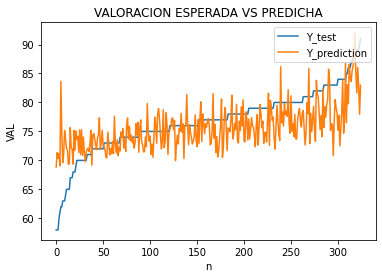

In [17]:
l = []
l1 =list(Y_test)
l2 = list(ynew)
l1new = []
l2new = []
for i in range(len(Y_test)):
    l.append([l1[i],l2[i]])
while len(l) != 0:
    c = 0
    min = l[0][0]
    for i in range(len(l)):
        if l[i][0] < min:
            min = l[i][0]
            c = i
    l1new.append(l[c][0])
    l2new.append(l[c][1])
    l.pop(c)
n = list(range(len(Y_test)))
fig, ax = plt.subplots()

ax.plot(n, l1new, label = "Y_test")
#ax.plot(n, n1, label = "n^2 - 1")
ax.plot(n, l2new, label = "Y_prediction")
#ax.plot(n, n2, label = "3^(n^2)")
ax.legend(loc = 'upper right')
ax.set_xlabel("n")
ax.set_ylabel("VAL")
ax.set_title("VALORACION ESPERADA VS PREDICHA")
plt.savefig('VALORACION ESPERADA VS PREDICHA.png')